1. Kaggle Titanic Prediction

The first project on this list is one of the most straightforward ML projects you can take on. This project is recommended to complete beginners in the data industry. The Titanic dataset is available on Kaggle, and the link to download it is given below.

This dataset is of passengers who travelled on the titanic. It has details like passenger age, ticket fare, cabin, and gender. Based on this information, you will need to predict whether these passengers survived or not.

It is a simple binary classification problem, and all you need to do is predict if a particular passenger survived. The best thing about this dataset is that all the pre-processing is done for you. You have a nice, clean dataset to train your machine learning model.

Since this is a classification problem, you can choose to use algorithms like logistic regression, decision trees, and random forests to build the predictive model. You can also choose gradient boosting models like an XGBoost classifier for this beginner level machine learning project to get better results.

Dataset: Kaggle Titanic Dataset

In [1]:
# Print all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Model selection
from sklearn.model_selection import cross_val_score, train_test_split

# Metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Algorithms
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:

test_df = pd.read_csv("./dataset/titanic/test.csv")
train_df = pd.read_csv("./dataset/titanic/train.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
### Let’s take a more detailed look at what data is actually missing:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


* The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

### What features could contribute to a high survival rate ?
* it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

In [9]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### 1. Age and Sex:

Text(0.5, 1.0, 'Female')

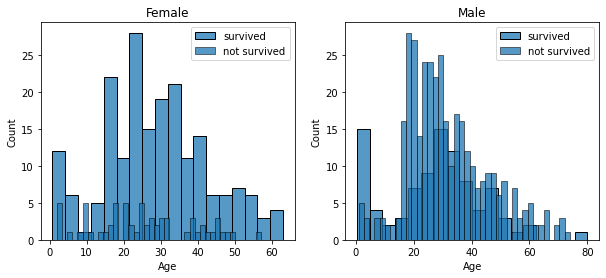

In [10]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

* You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

* For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

* Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

# 3. Embarked, Pclass and Sex:

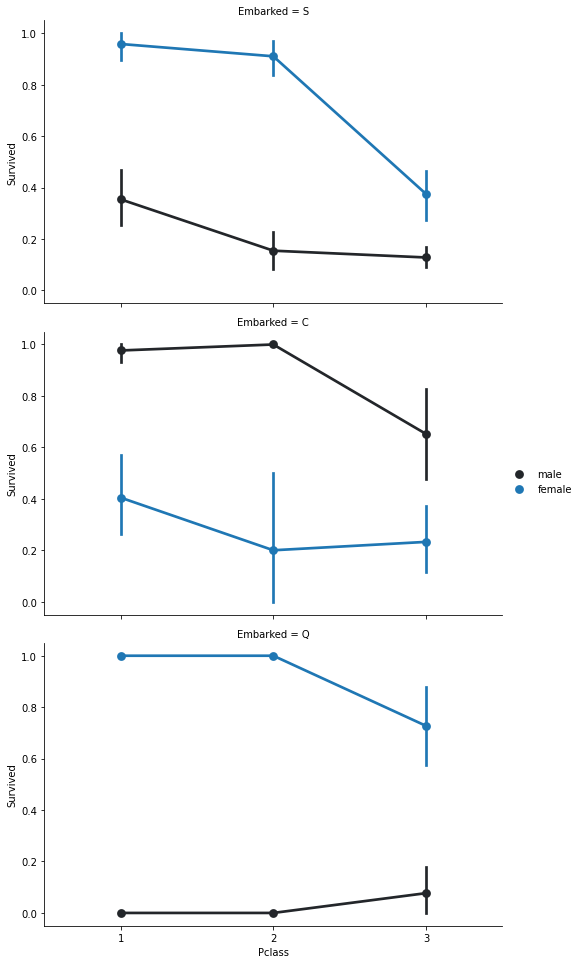

In [11]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

# 4. Pclass:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

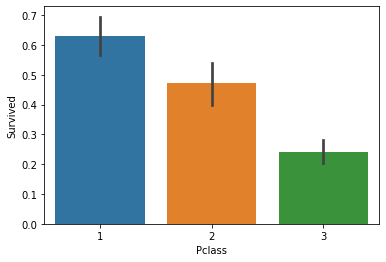

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

* Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

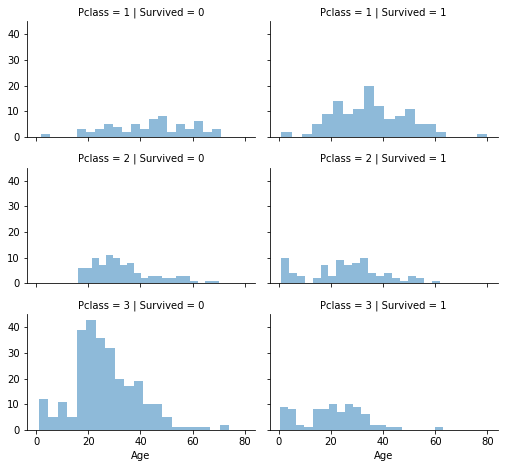

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

* The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

# 5. SibSp and Parch:


* SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [14]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

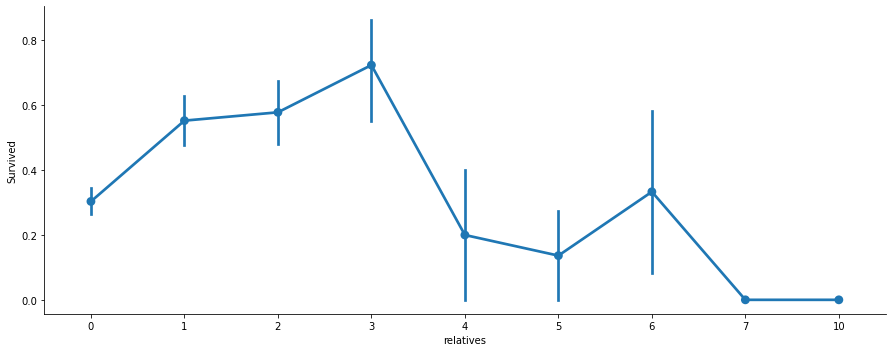

In [15]:
axes = sns.factorplot('relatives','Survived',  data=train_df, aspect = 2.5, )

* Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Data Preprocessing

* First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission.

In [16]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


### Missing Data:

#### Cabin:
* As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, we have to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero. In the picture below you can see the actual decks of the titanic, ranging from A to G.

In [17]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)



data

[     Survived  Pclass                                               Name  \
 0           0       3                            Braund, Mr. Owen Harris   
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2           1       3                             Heikkinen, Miss. Laina   
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4           0       3                           Allen, Mr. William Henry   
 ..        ...     ...                                                ...   
 886         0       2                              Montvila, Rev. Juozas   
 887         1       1                       Graham, Miss. Margaret Edith   
 888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
 889         1       1                              Behr, Mr. Karl Howell   
 890         0       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked

#### Age:
* Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [18]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

train_df["Age"].isnull().sum()

0

#### Embarked:

* Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [19]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Cabin      891 non-null    object 
 10  Embarked   891 non-null    object 
 11  relatives  891 non-null    int64  
 12  not_alone  891 non-null    int64  
 13  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 97.6+ KB


#### Converting Features:

* Above you can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

### Fare:

* Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [21]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#### Name:
* We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [22]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    


### Sex:
* Convert ‘Sex’ feature into numeric.

In [23]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#### Ticket:

In [24]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

#### Embarked:
* Convert ‘Embarked’ feature into numeric.

In [25]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [26]:
# Final drop

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,0,8,1
1,1,1,1,38,1,0,71,1,1,0,3,3
2,1,3,1,26,0,0,7,0,0,1,8,2
3,1,1,1,35,1,0,53,0,1,0,3,3
4,0,3,0,35,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1,8,5
887,1,1,1,19,0,0,30,0,0,1,2,2
888,0,3,1,24,1,2,23,0,3,0,8,2
889,1,1,0,26,0,0,30,1,0,1,3,1


## Creating Categories:

### Age:
* Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

6    162
4    161
3    144
5    142
2    116
1     98
0     68
Name: Age, dtype: int64

### Fare:
* For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [28]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5
887,1,1,1,2,0,0,2,0,0,1,2,2
888,0,3,1,3,1,2,2,0,3,0,8,2
889,1,1,0,3,0,0,2,1,0,1,3,1


## Creating new Features

* I will add two new features to the dataset, that I compute out of other features.

#### 1. Age times Class

In [29]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

#### 2. Fare per Person

In [30]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [31]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'not_alone', 'Deck', 'Title', 'Age_Class',
       'Fare_Per_Person'],
      dtype='object')

In [32]:
train_df.cov()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
Survived,0.236772,-0.137703,0.126376,-0.045273,-0.018954,0.032017,0.190035,0.033038,0.013063,-0.048451,-0.292271,0.204370,-0.623788,0.087572
Pclass,-0.137703,0.699015,-0.052712,-0.472007,0.076599,0.012429,-0.712165,0.024289,0.089028,0.055347,1.292801,-0.149785,1.593619,-0.511652
Sex,0.126376,-0.052712,0.228475,-0.068822,0.060422,0.094584,0.146939,0.035419,0.155006,-0.071063,-0.113385,0.247510,-0.361055,0.009412
Age,-0.045273,-0.472007,-0.068822,3.498546,-0.459605,-0.261080,0.232530,-0.040424,-0.720685,0.143688,-0.790395,-0.180094,6.374334,0.517350
SibSp,-0.018954,0.076599,0.060422,-0.459605,1.216043,0.368739,0.472223,-0.042032,1.584782,-0.315568,0.098665,0.306256,-0.988606,-0.254413
Parch,0.032017,0.012429,0.094584,-0.261080,0.368739,0.649728,0.372109,-0.040307,1.018467,-0.230242,-0.048595,0.262186,-0.497879,-0.206132
Fare,0.190035,-0.712165,0.146939,0.232530,0.472223,0.372109,1.564358,-0.044279,0.844332,-0.322309,-1.462010,0.404009,-2.241415,0.705138
Embarked,0.033038,0.024289,0.035419,-0.040424,-0.042032,-0.040307,-0.044279,0.404081,-0.082339,0.005542,-0.047641,0.029727,-0.053457,-0.024757
relatives,0.013063,0.089028,0.155006,-0.720685,1.584782,1.018467,0.844332,-0.082339,2.603248,-0.545810,0.050070,0.568442,-1.486485,-0.460546
not_alone,-0.048451,0.055347,-0.071063,0.143688,-0.315568,-0.230242,-0.322309,0.005542,-0.545810,0.239723,0.135229,-0.204661,0.569133,0.113120


<AxesSubplot:>

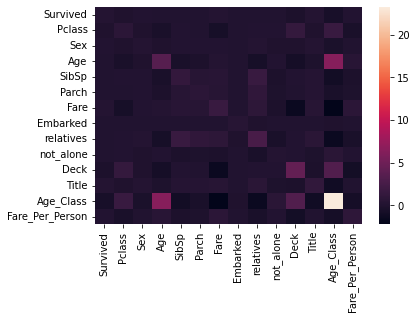

In [33]:
# fig, ax = plt.subplots(figsize = (24, 14)) 
sns.heatmap(train_df.cov()) 

In [34]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
Survived,1.000000,-0.338481,0.543351,-0.049743,-0.035322,0.081629,0.312249,0.106811,0.016639,-0.203367,-0.289569,0.407753,-0.265829,0.188668
Pclass,-0.338481,1.000000,-0.131900,-0.301829,0.083081,0.018443,-0.681035,0.045702,0.065997,0.135207,0.745453,-0.173929,0.395251,-0.641545
Sex,0.543351,-0.131900,1.000000,-0.076977,0.114631,0.245489,0.245782,0.116569,0.200988,-0.303646,-0.114358,0.502713,-0.156634,0.020643
Age,-0.049743,-0.301829,-0.076977,1.000000,-0.222826,-0.173167,0.099396,-0.033999,-0.238805,0.156899,-0.203719,-0.093477,0.706679,0.289959
SibSp,-0.035322,0.083081,0.114631,-0.222826,1.000000,0.414838,0.342377,-0.059961,0.890712,-0.584471,0.043134,0.269623,-0.185900,-0.241858
Parch,0.081629,0.018443,0.245489,-0.173167,0.414838,1.000000,0.369094,-0.078665,0.783111,-0.583398,-0.029064,0.315784,-0.128082,-0.268087
Fare,0.312249,-0.681035,0.245782,0.099396,0.342377,0.369094,1.000000,-0.055693,0.418396,-0.526320,-0.563527,0.313595,-0.371608,0.591019
Embarked,0.106811,0.045702,0.116569,-0.033999,-0.059961,-0.078665,-0.055693,1.000000,-0.080281,0.017807,-0.036131,0.045400,-0.017438,-0.040828
relatives,0.016639,0.065997,0.200988,-0.238805,0.890712,0.783111,0.418396,-0.080281,1.000000,-0.690922,0.014961,0.342039,-0.191044,-0.299234
not_alone,-0.203367,0.135207,-0.303646,0.156899,-0.584471,-0.583398,-0.526320,0.017807,-0.690922,1.000000,0.133152,-0.405813,0.241041,0.242203


<AxesSubplot:>

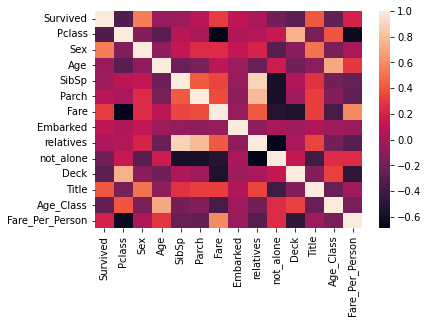

In [35]:
# fig, ax = plt.subplots(figsize = (24, 14)) 
sns.heatmap(train_df.corr()) 

# Building Machine Learning Models

In [36]:
# Using train_test_split

X_all = train_df.drop("Survived", axis=1)
Y_all = train_df["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=.2, random_state=23)

## Stochastic Gradient Descent (SGD):

SGDClassifier(max_iter=5, tol=None)

0.7949438202247191

confusion_matrix: [[105  10]
 [ 27  37]]
Precision: 0.7872340425531915
Recall: 0.578125
f1_score: 0.6666666666666667
accuracy_score: 0.7932960893854749
accuracy_score not normalize: 142
classification_report: ------------
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       115
           1       0.79      0.58      0.67        64

    accuracy                           0.79       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.79      0.79      0.78       179



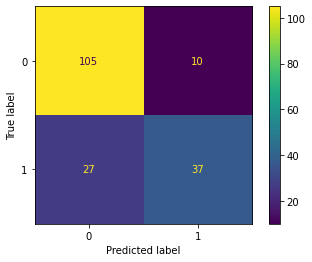

79.49

In [37]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("f1_score:",f1_score(Y_test, Y_pred))
print("accuracy_score:",accuracy_score(Y_test, Y_pred))
print("accuracy_score not normalize:",accuracy_score(Y_test, Y_pred, normalize=False))
print("classification_report: ------------")
print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(sgd, X_test, Y_test)  
plt.show() 
acc_sgd


## Random Forest:

In [38]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("f1_score:",f1_score(Y_test, Y_pred))
acc_random_forest

RandomForestClassifier()

0.9283707865168539

confusion_matrix: [[105  10]
 [ 27  37]]
Precision: 0.7872340425531915
Recall: 0.578125
f1_score: 0.6666666666666667


92.84

# Logistic Regression:

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("f1_score:",f1_score(Y_test, Y_pred))
acc_log

LogisticRegression()

confusion_matrix: [[98 17]
 [19 45]]
Precision: 0.7258064516129032
Recall: 0.703125
f1_score: 0.7142857142857143


82.3

# K Nearest Neighbor:

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("f1_score:",f1_score(Y_test, Y_pred))
acc_knn

KNeighborsClassifier(n_neighbors=3)

confusion_matrix: [[102  13]
 [ 21  43]]
Precision: 0.7678571428571429
Recall: 0.671875
f1_score: 0.7166666666666668


86.8

# Gaussian Naive Bayes:

In [41]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("f1_score:",f1_score(Y_test, Y_pred))
acc_gaussian

GaussianNB()

confusion_matrix: [[93 22]
 [15 49]]
Precision: 0.6901408450704225
Recall: 0.765625
f1_score: 0.725925925925926


78.23

# Perceptron:

In [42]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("f1_score:",f1_score(Y_test, Y_pred))
acc_perceptron

Perceptron(max_iter=5)

confusion_matrix: [[108   7]
 [ 31  33]]
Precision: 0.825
Recall: 0.515625
f1_score: 0.6346153846153846


79.49

# Linear Support Vector Machine:

In [43]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("f1_score:",f1_score(Y_test, Y_pred))
acc_linear_svc

LinearSVC()

confusion_matrix: [[98 17]
 [20 44]]
Precision: 0.7213114754098361
Recall: 0.6875
f1_score: 0.7040000000000001


81.88

# Decision Tree Classifier

In [44]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("f1_score:",f1_score(Y_test, Y_pred))
acc_decision_tree

DecisionTreeClassifier()

confusion_matrix: [[101  14]
 [ 21  43]]
Precision: 0.7543859649122807
Recall: 0.671875
f1_score: 0.7107438016528924


92.84

# Decision Tree Regressor

In [45]:
decision_tree_reg = DecisionTreeRegressor() 
decision_tree_reg.fit(X_train, Y_train)  
Y_pred = decision_tree_reg.predict(X_test)  
acc_decision_tree_reg = round(decision_tree_reg.score(X_train, Y_train) * 100, 2)

# ValueError: Classification metrics can't handle a mix of binary and continuous targets
# print("confusion_matrix:", confusion_matrix(Y_test, Y_pred))
# print("Precision:", precision_score(Y_test, Y_pred))
# print("Recall:",recall_score(Y_test, Y_pred))
# print("f1_score:",f1_score(Y_test, Y_pred))
acc_decision_tree_reg

DecisionTreeRegressor()

79.25

# Which is the best Model ?

In [46]:
dic = {
    "Support Vector Machines": {
         "model" : linear_svc,
         "score" : acc_linear_svc,
    },  
    "KNN": {
         "model" : knn,
         "score" : acc_knn, 
    },  
    "Logistic Regression": {
         "model" : logreg,
         "score" : acc_log, 
    },  
    "Random Forest": {
         "model" : random_forest,
         "score" : acc_random_forest, 
    },  
    "Naive Bayes": {
         "model" : gaussian,
         "score" : acc_gaussian, 
    },  
    "Perceptron": {
         "model" : perceptron,
         "score" : acc_perceptron, 
    },  
    "Stochastic Gradient Decent": {
         "model" : sgd,
         "score" : acc_sgd, 
    },  
    "Decision Tree Classifier": {
         "model" : decision_tree,
         "score" : acc_decision_tree, 
    },  
    "Decision Tree Regression" : {
         "model" : decision_tree_reg,
         "score" : acc_decision_tree_reg
    }
}

labels = []
scores = []
for label, valueObj in dic.items():
    labels.append(label)
    scores.append(valueObj['score'])
    
results = pd.DataFrame({
    'Model': labels,
    'Score': scores})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.84,Random Forest
92.84,Decision Tree Classifier
86.80,KNN
82.30,Logistic Regression
81.88,Support Vector Machines
79.49,Perceptron
79.49,Stochastic Gradient Decent
79.25,Decision Tree Regression
78.23,Naive Bayes


# With Cross validation

In [47]:
# Voting classifier works for classifier eliminating Regression
eliminationList = ['Logistic Regression', 'Decision Tree Regression']
voting_classifier_estimator = []

for label, valueObj in dic.items():
    if label not in eliminationList:
        voting_classifier_estimator.append((label, valueObj['model']))
        
voting_classifier_estimator      

[('Support Vector Machines', LinearSVC()),
 ('KNN', KNeighborsClassifier(n_neighbors=3)),
 ('Random Forest', RandomForestClassifier()),
 ('Naive Bayes', GaussianNB()),
 ('Perceptron', Perceptron(max_iter=5)),
 ('Stochastic Gradient Decent', SGDClassifier(max_iter=5, tol=None)),
 ('Decision Tree Classifier', DecisionTreeClassifier())]

# Voting Classifier

In [48]:
voting_clf = VotingClassifier(voting = "hard", estimators = voting_classifier_estimator)
voting_clf.fit(X_train, Y_train)  
Y_pred = voting_clf.predict(X_test)  
acc_voting_clf = round(voting_clf.score(X_train, Y_train) * 100, 2)
acc_voting_clf


VotingClassifier(estimators=[('Support Vector Machines', LinearSVC()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('Random Forest', RandomForestClassifier()),
                             ('Naive Bayes', GaussianNB()),
                             ('Perceptron', Perceptron(max_iter=5)),
                             ('Stochastic Gradient Decent',
                              SGDClassifier(max_iter=5, tol=None)),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier())])

87.36

In [49]:
dic["Voting Classifier"] = {
     "model" : voting_clf,
     "score" : acc_voting_clf
}

# Voting classifier works for classifier eliminating Regression
eliminationList = ['Logistic Regression', 'Decision Tree Regression']

labels = []
scores = []
for label, valueObj in dic.items():
    if label not in eliminationList:
        model = valueObj['model']
        score =  cross_val_score(model, 
                                 X_train,
                                 Y_train, 
                                 cv=10, 
                                 scoring = "accuracy")
        labels.append(label)
        scores.append(valueObj['score'])

results = pd.DataFrame({
    'Model': labels,
    'Score': scores})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.84,Random Forest
92.84,Decision Tree Classifier
87.36,Voting Classifier
86.80,KNN
81.88,Support Vector Machines
79.49,Perceptron
79.49,Stochastic Gradient Decent
78.23,Naive Bayes


* As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

### Let take 'Random Forest' and perfom K-Fold Cross Validation:

In [50]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.86111111 0.8028169  0.78873239 0.88732394 0.81690141
 0.8028169  0.74647887 0.87323944 0.76056338]
Mean: 0.811776212832551
Standard Deviation: 0.045474535494009385


* This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

* This means in our case that the accuracy of our model can differ + — 4%.

* I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

 ## Good parts of Random forest
 
 * Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
 * One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.
 * great quality of random forest is that they make it very easy to measure the relative importance of each feature

                 importance
feature                    
Title                 0.209
Sex                   0.162
Age_Class             0.105
Deck                  0.079
Age                   0.076
Pclass                0.075
Fare                  0.060
Embarked              0.058
relatives             0.056
SibSp                 0.041
Fare_Per_Person       0.039
Parch                 0.029
not_alone             0.011


<AxesSubplot:xlabel='feature'>

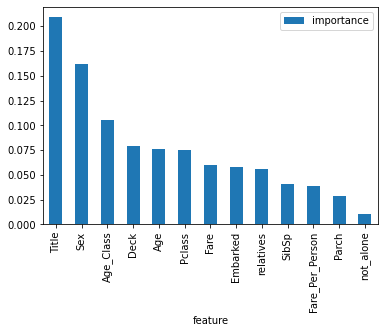

In [51]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances.head(15))
importances.plot.bar()

# Conclusion:

* not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it’s just fine to remove only Alone and Parch.

 ### Training random forest again:  

In [52]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

RandomForestClassifier(oob_score=True)

0.9283707865168539

92.84 %


* Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

##### There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [53]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.47999999999999 %


# Hyperparameter Tuning

* code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

In [54]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

RandomForestClassifier(min_samples_split=10, n_jobs=-1, oob_score=True,
                       random_state=1)

0.8890449438202247

oob score: 82.87 %


* Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it’s more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

# Further Evaluation

## Confusion Matrix:

In [55]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[386,  48],
       [ 73, 205]])

* The first row is about the not-survived-predictions: 493 passengers were correctly classified as not survived (called true negatives) and 56 where wrongly classified as not survived (false positives).

* The second row is about the survived-predictions: 93 passengers where wrongly classified as survived (false negatives) and 249 where correctly classified as survived (true positives).

* A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

### Precision and Recall:

In [56]:

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8102766798418972
Recall: 0.737410071942446


* Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 73 % of the people who actually survived.

# F-Score

* You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.



In [57]:
f1_score(Y_train, predictions)

0.7721280602636534

* There we have it, a 77 % F-score. The score is not that high, because we have a recall of 73%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. We will discuss this in the following section.

### Precision Recall Curve

* For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part.

    
   We will plot the precision and recall with the threshold using matplotlib:
   

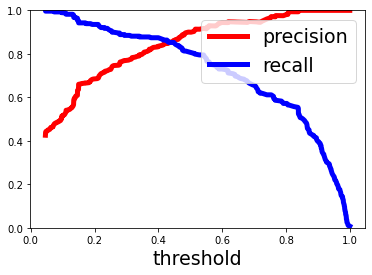

In [58]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

# plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

* Above you can clearly see that the recall is falling of rapidly at a precision of around 85%. Because of that you may want to select the precision/recall tradeoff before that — maybe at around 75 %.

    You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.



Another way is to plot the precision and recall against each other:

<Figure size 1008x504 with 0 Axes>

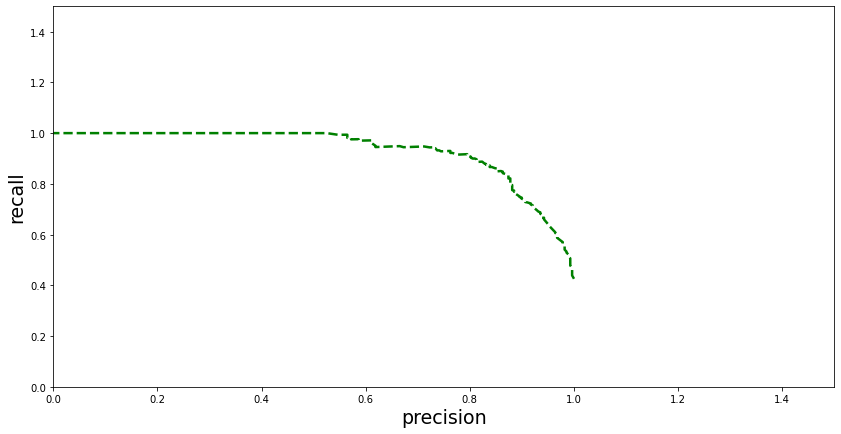

In [59]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

# plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

# ROC AUC Curve

* Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

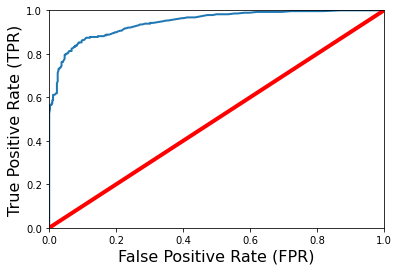

In [60]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

# plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

* The red line in the middle represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

* Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

## ROC AUC Score

   * The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

   * A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [61]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9455375791532673


# Summary

* We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training 8 different machine learning models, picked one of them (random forest) and applied cross validation on it. Then we discussed how random forest works, took a look at the importance it assigns to the different features and tuned it’s performace through optimizing it’s hyperparameter values. Lastly, we looked at it’s confusion matrix and computed the models precision, recall and f-score.




* Of course there is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features. Another thing that can improve the overall result on the kaggle leaderboard would be a more extensive hyperparameter tuning on several machine learning models. You could also do some ensemble learning.
